In [1]:
import dask.array as dsar
import matplotlib.pyplot as plt
import numpy as np
import numpy.testing as npt
import xarray as xr
import xrft
from matplotlib import colors

%matplotlib inline

# Parallelized Bartlett's Method
For long data sets that have reached statistical equilibrium, it is useful to chunk the data, calculate the periodogram for each chunk and then take the average to reduce variance.

In [2]:
np.random.seed(42)
np.set_printoptions(edgeitems=2)

n = 2**8
da = xr.DataArray(np.random.rand(n, n//2, n//2), dims=['time', 'y', 'x'])
da

<xarray.DataArray (time: 256, y: 128, x: 128)>
array([[[0.37454012, 0.95071431, ..., 0.81801477, 0.86073058],
        [0.00695213, 0.5107473 , ..., 0.16949275, 0.55680126],
        ...,
        [0.90852403, 0.44136756, ..., 0.0516418 , 0.9962421 ],
        [0.7365572 , 0.08745016, ..., 0.52649853, 0.5162331 ]],

       [[0.87315929, 0.20553847, ..., 0.87976694, 0.44031298],
        [0.62520832, 0.49041036, ..., 0.34849535, 0.82265612],
        ...,
        [0.66269854, 0.36577369, ..., 0.64982206, 0.89748638],
        [0.45946862, 0.00836947, ..., 0.97922982, 0.90108442]],

       ...,

       [[0.37980738, 0.22115414, ..., 0.71791356, 0.12127953],
        [0.51225929, 0.4663246 , ..., 0.33682087, 0.15090019],
        ...,
        [0.05638765, 0.67847929, ..., 0.26920986, 0.87433108],
        [0.76589517, 0.95161275, ..., 0.55565673, 0.27902325]],

       [[0.13304204, 0.36165999, ..., 0.9761357 , 0.64379419],
        [0.84308903, 0.7042752 , ..., 0.55923313, 0.15030696],
        ...,
        [0.08574744, 0.71378142, ..., 0.44964498, 0.44554641],
        [0.69503646, 0.92408159, ..., 0.8577461 , 0.82631412]]])
Dimensions without coordinates: time, y, x

## One dimension
### Discrete Fourier Transform

In [3]:
da_chunked = da.chunk({'time': n//4})
da_chunked

<xarray.DataArray (time: 256, y: 128, x: 128)>
dask.array<xarray-<this-array>, shape=(256, 128, 128), dtype=float64, chunksize=(64, 128, 128), chunktype=numpy.ndarray>
Dimensions without coordinates: time, y, x

In [4]:
daft = xrft.fft(da_chunked, dim=['time'], shift=False , chunks_to_segments=True).compute()
daft

c:\users\zmoon\git\xrft\xrft\xrft.py:347: FutureWarning: Flags true_phase and true_amplitude will be set to True in future versions of xrft.dft to preserve the theoretical phasing and amplitude of Fourier Transform. Consider using xrft.fft to ensure future compatibility with numpy.fft like behavior and to deactivate this warning.
  warnings.warn(msg, FutureWarning)


<xarray.DataArray 'fftn-3a503418093010adceb5dbf5a2759920' (time_segment: 4, freq_time: 64, y: 128, x: 128)>
array([[[[ 3.04275615e+01+0.j        ,  3.04070471e+01+0.j        ,
          ...,  3.13327034e+01+0.j        ,
           3.41680724e+01+0.j        ],
         [ 3.34108379e+01+0.j        ,  3.35497119e+01+0.j        ,
          ...,  2.99278169e+01+0.j        ,
           3.33127071e+01+0.j        ],
         ...,
         [ 3.57882335e+01+0.j        ,  2.92711075e+01+0.j        ,
          ...,  3.41733335e+01+0.j        ,
           3.76466842e+01+0.j        ],
         [ 3.66918724e+01+0.j        ,  3.00492889e+01+0.j        ,
          ...,  3.27852953e+01+0.j        ,
           3.39650329e+01+0.j        ]],

        [[-1.71780176e+00-3.8350854j ,  2.11638519e+00-2.68663187j,
          ..., -1.27213391e+00-1.0886499j ,
           1.32765261e+00-0.22620235j],
         [-3.34655496e+00+0.73068476j,  1.12375993e+00+1.01184767j,
          ...,  2.15842273e+00-0.53010756j,
           9.45156533e-01+0.39540872j],
...
         [-2.42186392e+00+4.21358201j, -1.94794224e+00-1.50914707j,
          ..., -6.10507815e-01+1.34491213j,
          -3.25578483e+00-0.07834045j],
         [-2.50536824e-01-1.47216093j, -1.05466916e+00-0.16700293j,
          ...,  4.08207540e-01-1.1420307j ,
          -1.23225413e+00+0.67961108j]],

        [[-2.34468531e+00+0.64660455j, -1.27249426e+00+3.00954048j,
          ...,  1.65238922e+00-0.12094772j,
          -3.27757432e+00+0.38897244j],
         [ 1.56963673e+00+0.59041267j, -7.72469058e-01-0.88308146j,
          ..., -1.19544659e+00+0.36516077j,
           1.30093133e+00+2.11648012j],
         ...,
         [-2.27508501e+00+1.29138639j, -1.67416002e+00+1.99822807j,
          ...,  5.04822866e-01+0.73084585j,
          -7.91053043e-01-2.55680915j],
         [-4.49106525e-01+1.22839785j, -2.83221836e+00-1.15185018j,
          ..., -6.14847741e-01+2.56170558j,
           9.94684786e-04-3.53138968j]]]])
Coordinates:
  * time_segment  (time_segment) int32 0 1 2 3
  * y             (y) int64 0 1 2 3 4 5 6 7 ... 120 121 122 123 124 125 126 127
  * x             (x) int64 0 1 2 3 4 5 6 7 ... 120 121 122 123 124 125 126 127
  * freq_time     (freq_time) float64 0.0 0.01562 0.03125 ... -0.03125 -0.01562

In [5]:
data = da_chunked.data
data_rs = data.reshape(4, n//4, n//2, n//2)
da_rs = xr.DataArray(data_rs, dims=['time_segment', 'time', 'y', 'x'])
da1 = xr.DataArray(
    dsar.fft.fftn(data_rs, axes=[1]).compute(),
    dims=['time_segment','freq_time','y','x']
)
da1

<xarray.DataArray (time_segment: 4, freq_time: 64, y: 128, x: 128)>
array([[[[ 3.04275615e+01+0.j        ,  3.04070471e+01+0.j        ,
          ...,  3.13327034e+01+0.j        ,
           3.41680724e+01+0.j        ],
         [ 3.34108379e+01+0.j        ,  3.35497119e+01+0.j        ,
          ...,  2.99278169e+01+0.j        ,
           3.33127071e+01+0.j        ],
         ...,
         [ 3.57882335e+01+0.j        ,  2.92711075e+01+0.j        ,
          ...,  3.41733335e+01+0.j        ,
           3.76466842e+01+0.j        ],
         [ 3.66918724e+01+0.j        ,  3.00492889e+01+0.j        ,
          ...,  3.27852953e+01+0.j        ,
           3.39650329e+01+0.j        ]],

        [[-1.71780176e+00-3.8350854j ,  2.11638519e+00-2.68663187j,
          ..., -1.27213391e+00-1.0886499j ,
           1.32765261e+00-0.22620235j],
         [-3.34655496e+00+0.73068476j,  1.12375993e+00+1.01184767j,
          ...,  2.15842273e+00-0.53010756j,
           9.45156533e-01+0.39540872j],
...
         [-2.42186392e+00+4.21358201j, -1.94794224e+00-1.50914707j,
          ..., -6.10507815e-01+1.34491213j,
          -3.25578483e+00-0.07834045j],
         [-2.50536824e-01-1.47216093j, -1.05466916e+00-0.16700293j,
          ...,  4.08207540e-01-1.1420307j ,
          -1.23225413e+00+0.67961108j]],

        [[-2.34468531e+00+0.64660455j, -1.27249426e+00+3.00954048j,
          ...,  1.65238922e+00-0.12094772j,
          -3.27757432e+00+0.38897244j],
         [ 1.56963673e+00+0.59041267j, -7.72469058e-01-0.88308146j,
          ..., -1.19544659e+00+0.36516077j,
           1.30093133e+00+2.11648012j],
         ...,
         [-2.27508501e+00+1.29138639j, -1.67416002e+00+1.99822807j,
          ...,  5.04822866e-01+0.73084585j,
          -7.91053043e-01-2.55680915j],
         [-4.49106525e-01+1.22839785j, -2.83221836e+00-1.15185018j,
          ..., -6.14847741e-01+2.56170558j,
           9.94684786e-04-3.53138968j]]]])
Dimensions without coordinates: time_segment, freq_time, y, x

We assert that our calculations give equal results.

In [6]:
npt.assert_almost_equal(da1, daft.values)

### Power Spectrum

In [7]:
ps = xrft.power_spectrum(da_chunked, dim=['time'], chunks_to_segments=True)
ps

<xarray.DataArray 'rechunk-merge-8890ec4f1e694f8fb47bb7b49bf1de60' (time_segment: 4, freq_time: 64, y: 128, x: 128)>
dask.array<mul, shape=(4, 64, 128, 128), dtype=float64, chunksize=(1, 64, 128, 128), chunktype=numpy.ndarray>
Coordinates:
  * time_segment  (time_segment) int32 0 1 2 3
  * y             (y) int64 0 1 2 3 4 5 6 7 ... 120 121 122 123 124 125 126 127
  * x             (x) int64 0 1 2 3 4 5 6 7 ... 120 121 122 123 124 125 126 127
  * freq_time     (freq_time) float64 -0.5 -0.4844 -0.4688 ... 0.4688 0.4844

Taking the mean over the segments gives the Barlett's estimate.

In [8]:
ps = ps.mean(['time_segment', 'y', 'x']).compute()
ps

<xarray.DataArray 'rechunk-merge-8890ec4f1e694f8fb47bb7b49bf1de60' (freq_time: 64)>
array([ 0.0822994 ,  0.08318687,  0.08423205,  0.08286732,  0.08314404,
        0.0833294 ,  0.08355509,  0.08353916,  0.0832645 ,  0.08389559,
        0.08328535,  0.08325178,  0.0832305 ,  0.08298212,  0.08303852,
        0.08343363,  0.0825896 ,  0.08329751,  0.08317598,  0.08358536,
        0.08369741,  0.0830625 ,  0.08337486,  0.08417442,  0.08269168,
        0.08352632,  0.08301033,  0.08378805,  0.08328842,  0.08334037,
        0.08365589,  0.08328598, 16.08265403,  0.08328598,  0.08365589,
        0.08334037,  0.08328842,  0.08378805,  0.08301033,  0.08352632,
        0.08269168,  0.08417442,  0.08337486,  0.0830625 ,  0.08369741,
        0.08358536,  0.08317598,  0.08329751,  0.0825896 ,  0.08343363,
        0.08303852,  0.08298212,  0.0832305 ,  0.08325178,  0.08328535,
        0.08389559,  0.0832645 ,  0.08353916,  0.08355509,  0.0833294 ,
        0.08314404,  0.08286732,  0.08423205,  0.08318687])
Coordinates:
  * freq_time  (freq_time) float64 -0.5 -0.4844 -0.4688 ... 0.4531 0.4688 0.4844

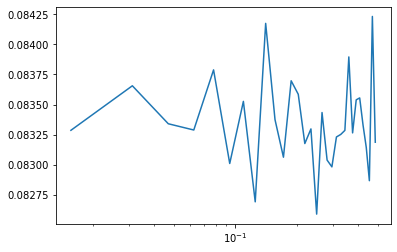

In [9]:
fig, ax = plt.subplots()

ax.semilogx(ps.freq_time[n//8 + 1:], ps[n//8 + 1:])

## Two dimension
### Discrete Fourier Transform

In [10]:
da_chunked2 = da.chunk({'y': 32, 'x': 32})
da_chunked2

<xarray.DataArray (time: 256, y: 128, x: 128)>
dask.array<xarray-<this-array>, shape=(256, 128, 128), dtype=float64, chunksize=(256, 32, 32), chunktype=numpy.ndarray>
Dimensions without coordinates: time, y, x

In [11]:
daft = xrft.fft(da_chunked2, dim=['y','x'], shift=False , chunks_to_segments=True).compute()
daft

c:\users\zmoon\git\xrft\xrft\xrft.py:347: FutureWarning: Flags true_phase and true_amplitude will be set to True in future versions of xrft.dft to preserve the theoretical phasing and amplitude of Fourier Transform. Consider using xrft.fft to ensure future compatibility with numpy.fft like behavior and to deactivate this warning.
  warnings.warn(msg, FutureWarning)


<xarray.DataArray 'fftn-b5d909a58bf2b5448926475664707cf4' (time: 256, y_segment: 4, freq_y: 32, x_segment: 4, freq_x: 32)>
array([[[[[ 5.12574137e+02+0.00000000e+00j,
           -3.91888705e+00-9.19831925e-01j, ...,
           -9.84527885e+00-6.15310238e+00j,
           -3.91888705e+00+9.19831925e-01j],
          [ 5.07347794e+02+0.00000000e+00j,
            3.79693809e+00+5.70092814e-01j, ...,
           -2.63561036e+00-3.02296894e+00j,
            3.79693809e+00-5.70092814e-01j],
          [ 5.03097187e+02+0.00000000e+00j,
            2.90490798e+00-1.47772821e+01j, ...,
            3.42125014e+00+9.14353115e-01j,
            2.90490798e+00+1.47772821e+01j],
          [ 5.16574333e+02+0.00000000e+00j,
            1.05921075e+01+1.69903252e+00j, ...,
            3.64428449e+00+1.39509922e+00j,
            1.05921075e+01-1.69903252e+00j]],

         [[ 7.16306266e-01-2.73677635e+00j,
            1.03872840e+01-1.95456035e+00j, ...,
           -6.45706853e-02-4.37418156e+00j,
...
           -1.23134147e+00+2.77575997e+00j, ...,
           -3.77817981e+00+2.00753238e+00j,
           -4.66368067e+00-1.56960297e+00j]],

         [[-3.85120827e-01-8.09457586e-01j,
            1.92525875e+00+8.00579049e+00j, ...,
            1.29216767e+00+1.21065275e+01j,
            2.61102376e+00-4.27162055e-01j],
          [ 1.00089606e+00+5.36388802e+00j,
            5.68732800e+00-7.11047435e+00j, ...,
           -1.71208012e+00+5.45064624e+00j,
            3.30031381e+00-1.16662691e+00j],
          [ 9.82555404e+00+2.88969155e+00j,
           -1.34389231e+01-1.88076983e+00j, ...,
            2.07255582e+00+6.63590027e+00j,
            2.17139125e+00-5.34713943e-01j],
          [ 1.84331751e+00+9.19765914e+00j,
            2.39901606e+00+4.15347887e+00j, ...,
            8.48760528e+00+4.94598333e+00j,
            1.27965378e+01+7.47818523e+00j]]]]])
Coordinates:
  * time       (time) int64 0 1 2 3 4 5 6 7 ... 248 249 250 251 252 253 254 255
  * y_segment  (y_segment) int32 0 1 2 3
  * x_segment  (x_segment) int32 0 1 2 3
  * freq_y     (freq_y) float64 0.0 0.03125 0.0625 ... -0.09375 -0.0625 -0.03125
  * freq_x     (freq_x) float64 0.0 0.03125 0.0625 ... -0.09375 -0.0625 -0.03125

In [12]:
data = da_chunked2.data
data_rs = data.reshape(256, 4, 32, 4, 32)
da_rs = xr.DataArray(data_rs, dims=['time', 'y_segment', 'y', 'x_segment', 'x'])
da2 = xr.DataArray(
    dsar.fft.fftn(data_rs, axes=[2,4]).compute(),
    dims=['time', 'y_segment', 'freq_y', 'x_segment', 'freq_x']
)
da2

<xarray.DataArray (time: 256, y_segment: 4, freq_y: 32, x_segment: 4, freq_x: 32)>
array([[[[[ 5.12574137e+02+0.00000000e+00j,
           -3.91888705e+00-9.19831925e-01j, ...,
           -9.84527885e+00-6.15310238e+00j,
           -3.91888705e+00+9.19831925e-01j],
          [ 5.07347794e+02+0.00000000e+00j,
            3.79693809e+00+5.70092814e-01j, ...,
           -2.63561036e+00-3.02296894e+00j,
            3.79693809e+00-5.70092814e-01j],
          [ 5.03097187e+02+0.00000000e+00j,
            2.90490798e+00-1.47772821e+01j, ...,
            3.42125014e+00+9.14353115e-01j,
            2.90490798e+00+1.47772821e+01j],
          [ 5.16574333e+02+0.00000000e+00j,
            1.05921075e+01+1.69903252e+00j, ...,
            3.64428449e+00+1.39509922e+00j,
            1.05921075e+01-1.69903252e+00j]],

         [[ 7.16306266e-01-2.73677635e+00j,
            1.03872840e+01-1.95456035e+00j, ...,
           -6.45706853e-02-4.37418156e+00j,
...
           -1.23134147e+00+2.77575997e+00j, ...,
           -3.77817981e+00+2.00753238e+00j,
           -4.66368067e+00-1.56960297e+00j]],

         [[-3.85120827e-01-8.09457586e-01j,
            1.92525875e+00+8.00579049e+00j, ...,
            1.29216767e+00+1.21065275e+01j,
            2.61102376e+00-4.27162055e-01j],
          [ 1.00089606e+00+5.36388802e+00j,
            5.68732800e+00-7.11047435e+00j, ...,
           -1.71208012e+00+5.45064624e+00j,
            3.30031381e+00-1.16662691e+00j],
          [ 9.82555404e+00+2.88969155e+00j,
           -1.34389231e+01-1.88076983e+00j, ...,
            2.07255582e+00+6.63590027e+00j,
            2.17139125e+00-5.34713943e-01j],
          [ 1.84331751e+00+9.19765914e+00j,
            2.39901606e+00+4.15347887e+00j, ...,
            8.48760528e+00+4.94598333e+00j,
            1.27965378e+01+7.47818523e+00j]]]]])
Dimensions without coordinates: time, y_segment, freq_y, x_segment, freq_x

We assert that our calculations give equal results.

In [13]:
npt.assert_almost_equal(da2, daft.values)

### Power Spectrum

In [14]:
ps = xrft.power_spectrum(
    da.chunk({'time': 1, 'y': 64, 'x': 64}),
    dim=['y', 'x'],
    chunks_to_segments=True, window="hann", detrend='linear'
)
ps = ps.mean(['time', 'y_segment', 'x_segment']).compute()
ps

<xarray.DataArray 'rechunk-merge-66c3aaf087ca8fb2ba59ae3447c47a57' (freq_y: 64, freq_x: 64)>
array([[0.01206814, 0.01185798, ..., 0.0117029 , 0.01185798],
       [0.01164809, 0.01132902, ..., 0.01182616, 0.0119674 ],
       ...,
       [0.01135967, 0.01194001, ..., 0.01155556, 0.01094249],
       [0.01164809, 0.0119674 , ..., 0.01153195, 0.01132902]])
Coordinates:
  * freq_y   (freq_y) float64 -0.5 -0.4844 -0.4688 ... 0.4531 0.4688 0.4844
  * freq_x   (freq_x) float64 -0.5 -0.4844 -0.4688 ... 0.4531 0.4688 0.4844

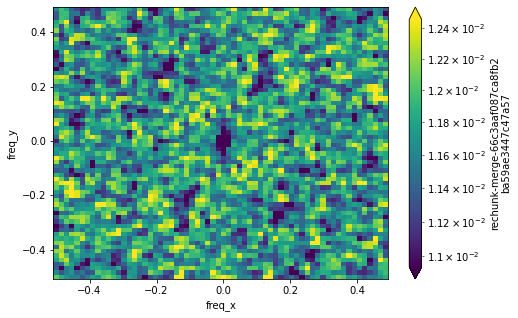

In [15]:
ps.plot(norm=colors.LogNorm(), robust=True, size=5)